# Candlesticks no Python
- tutorial original @NeuralNine
- adaptado por @victordhn

### Libraries utilizadas:
- mpl finance
- yfinance
- datetime
- pandas
- matplotlib

In [153]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

# para ignorar uns warnings chatos do Jupyter
import warnings
warnings.filterwarnings('ignore')

In [154]:
# Definir horizonte de tempo
inicio_full = input('Data de início no formato AAAA-M-D: ')
inicio = inicio_full.split('-')
start = dt.datetime(int(inicio[0]),int(inicio[1]),int(inicio[2]))
end = dt.datetime.now()

Data de início no formato AAAA-M-D: 2021-1-1


In [155]:
# Definir ativo
ticker = input('Ticker da ação (se for brasileira, usar ".SA" no final): ')
ticker = ticker.upper()
data = yf.download(ticker,start,end)
data.head();

Ticker da ação (se for brasileira, usar ".SA" no final): petr4.sa
[*********************100%***********************]  1 of 1 completed


In [156]:
data=data[['Open','High','Low','Close']]
data.head();

In [157]:
# Aqui nós precisamos da primeira coluna de datas fora do index e no formato de números
data.reset_index(inplace=True)
data['Date'] = data['Date'].map(mdates.date2num)

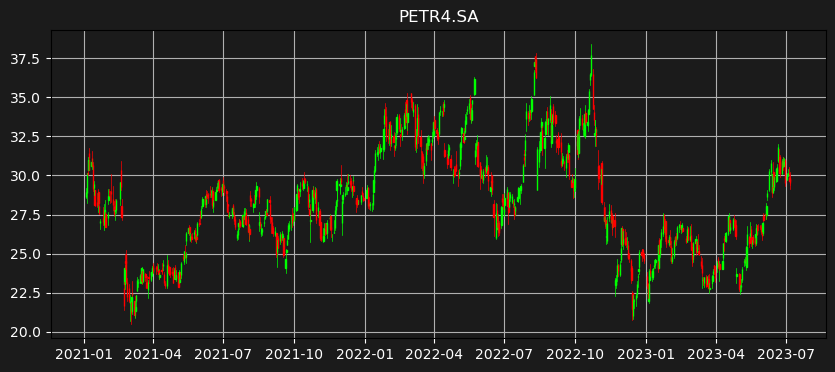

In [158]:
# Plot
fig, ax = plt.subplots(figsize=(10, 4))
ax.grid(True)
ax.set_axisbelow(True)
ax.set_facecolor('#1B1B1B')
ax.set_title(f'{ticker}',color='white')
ax.figure.set_facecolor('#1B1B1B')
ax.tick_params(axis='x',colors='white')
ax.tick_params(axis='y',colors='white')
ax.xaxis_date()

candlestick_ohlc(ax,data.values,width=0.5,colorup='#00ff00',colordown='red')
plt.show()